# Data Loading and Splitting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Load and clean data
df = pd.read_csv("heart.csv")
df.columns = df.columns.str.strip()

# Identify categorical and numerical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if (df[col].dtype in ['int64', 'float64']) 
          and (col != "HeartDisease")]

# Split data into features (X) and target (Y)
x = df.drop("HeartDisease", axis=1)
Y = df["HeartDisease"]

# Split into train, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(
    x, Y, test_size=0.30, stratify=Y, random_state=42
)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42
)

# Reset indices to ensure alignment between features and labels
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize encoders/scalers
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
scaler = StandardScaler()

# Process training data
x_train_cat = ohe.fit_transform(x_train[cat_col])
x_train_num = scaler.fit_transform(x_train[num_col])
x_train_processed = np.hstack([x_train_num, x_train_cat])

# Process validation/test data
x_val_cat = ohe.transform(x_val[cat_col])
x_val_num = scaler.transform(x_val[num_col])
x_val_processed = np.hstack([x_val_num, x_val_cat])

x_test_cat = ohe.transform(x_test[cat_col])
x_test_num = scaler.transform(x_test[num_col])
x_test_processed = np.hstack([x_test_num, x_test_cat])

# Get feature names
num_feature_names = num_col
cat_feature_names = ohe.get_feature_names_out(cat_col)
all_feature_names = num_feature_names + list(cat_feature_names)

# Create DataFrames with reset indices
x_train = pd.DataFrame(x_train_processed, columns=all_feature_names)
x_val = pd.DataFrame(x_val_processed, columns=all_feature_names)
x_test = pd.DataFrame(x_test_processed, columns=all_feature_names)

print(f"Training Set: {x_train.shape}, Validation: {x_val.shape}, Test: {x_test.shape}")

Training Set: (642, 20), Validation: (92, 20), Test: (184, 20)


# Training Data on Arbitrary K

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
val_score = knn.score(x_val, y_val)
test_score = knn.score(x_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Validation Score: {val_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 0.8754
Validation Score: 0.8913
Test Score: 0.8750


# Tune Hyperparameters

In [10]:
models = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    models.append(knn)

val_scores = [model.score(x_val, y_val) for model in models]
best_k = np.argmax(val_scores) + 1
print(f"Best k: {best_k}")

Best k: 11


# Train on K = 11


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

train_score = knn.score(x_train, y_train)
val_score = knn.score(x_val, y_val)
test_score = knn.score(x_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Validation Score: {val_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 0.8707
Validation Score: 0.9348
Test Score: 0.8859


# Results and Evaluation

Test Accuracy: 0.8859
Test F1 Score: 0.8986


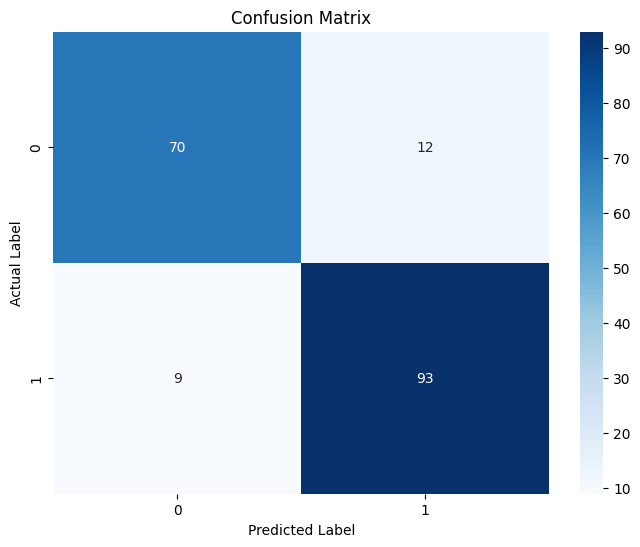

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

prediction_test = knn.predict(x_test)
accuracy = accuracy_score(y_test, prediction_test)
f1 = f1_score(y_test, prediction_test)
conf_matrix = confusion_matrix(y_test, prediction_test)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()